### Para realizar la EDA, seguiremos una serie de pasos:

# 1. Configuración del entorno

In [63]:
# Importación de las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Carga de los datos

En este paso vamos a realizar la carga del archivo para realizar un analisis descriptivo de su estructura

In [64]:
# Cargamos el archivo CSV
df = pd.read_csv('../datasets/ofertas_relampago.csv')

# 3. Examen inicial de los Datos

In [65]:
# Mostramos el tamaño del dataset 
print("Tamaño del dataset")
print(f"Filas: {df.shape[0]}")
print(f"Columnas: {df.shape[1]}")

# Vemos el tipo de datos
print("\nInformacion general del dataset")
df.info()

# Mostramos las primeras 10 filas
print("\nPrimeras 10 filas del dataset:")
display(df.head(10))

Tamaño del dataset
Filas: 48746
Columnas: 13

Informacion general del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48746 entries, 0 to 48745
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OFFER_START_DATE           48746 non-null  object 
 1   OFFER_START_DTTM           48746 non-null  object 
 2   OFFER_FINISH_DTTM          48746 non-null  object 
 3   OFFER_TYPE                 48746 non-null  object 
 4   INVOLVED_STOCK             48746 non-null  int64  
 5   REMAINING_STOCK_AFTER_END  48746 non-null  int64  
 6   SOLD_AMOUNT                24579 non-null  float64
 7   SOLD_QUANTITY              24579 non-null  float64
 8   ORIGIN                     11316 non-null  object 
 9   SHIPPING_PAYMENT_TYPE      48746 non-null  object 
 10  DOM_DOMAIN_AGG1            48746 non-null  object 
 11  VERTICAL                   48746 non-null  object 
 12  DOMAIN_ID               

,OFFER_START_DATE,OFFER_START_DTTM,OFFER_FINISH_DTTM,OFFER_TYPE,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY,ORIGIN,SHIPPING_PAYMENT_TYPE,DOM_DOMAIN_AGG1,VERTICAL,DOMAIN_ID
0,2021-06-22,2021-06-22 16:00:00+00:00,2021-06-22 23:02:43+00:00,lightning_deal,4,-2,4.72,6.0,A,none,PETS FOOD,CPG,MLM-BIRD_FOODS
1,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:02+00:00,lightning_deal,5,5,NaN,NaN,NaN,free_shipping,PET PRODUCTS,OTHERS,MLM-ANIMAL_AND_PET_PRODUCTS
2,2021-06-22,2021-06-22 07:00:00+00:00,2021-06-22 13:00:01+00:00,lightning_deal,15,12,10.73,3.0,NaN,none,COMPUTERS,CE,MLM-SPEAKERS
3,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-23 01:36:12+00:00,lightning_deal,15,13,7.03,2.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
4,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 15:48:12+00:00,lightning_deal,15,0,39.65,15.0,NaN,none,COMPUTERS,CE,MLM-HEADPHONES
5,2021-06-22,2021-06-22 18:00:00+00:00,2021-06-23 01:00:12+00:00,lightning_deal,23,23,NaN,NaN,A,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
6,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,10,10,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
7,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:39+00:00,lightning_deal,10,-1,103.03,11.0,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
8,2021-06-22,2021-06-22 19:00:00+00:00,2021-06-22 23:05:32+00:00,lightning_deal,10,-1,NaN,NaN,NaN,free_shipping,COMPUTERS,CE,MLM-HEADPHONES
9,2021-06-22,2021-06-22 13:00:00+00:00,2021-06-22 19:00:00+00:00,lightning_deal,15,13,10.65,2.0,NaN,free_shipping,ELECTRONICS,CE,MLM-SMART_SPEAKERS


- La columna `OFFER_START_DTTM` incluye la misma información que `OFFER_START_DATE`, pero con mayor granularidad, ya que incorpora la hora exacta.
- La columna `REMAINING_STOCK_AFTER_END` presenta valores negativos.
- Las columnas `SOLD_AMOUNT`, `SOLD_QUANTITY` y `ORIGIN` presentan valores nulos (verificar si las otras columnas igual)

In [66]:
# Obtenermos una visualización general de la estadística descriptiva
df.describe().round(2)

,INVOLVED_STOCK,REMAINING_STOCK_AFTER_END,SOLD_AMOUNT,SOLD_QUANTITY
count,48746.00,48746.00,24579.00,24579.00
mean,35.01,30.57,51.21,10.85
std,206.76,195.81,175.25,45.48
min,1.00,-192.00,0.28,1.00
25%,5.00,4.00,5.73,1.00
50%,10.00,8.00,12.42,3.00
75%,15.00,15.00,30.92,6.00
max,9000.00,8635.00,4836.57,1646.00


A partir de estos datos podemos observar:

- **INVOLVED_STOCK** presenta una mediana de 10 unidades ofertadas por producto pero un máximo de 9000 unidades, lo que indica una alta dispersión y presencia de outliers.

- **REMAINING_STOCK_AFTER_END** tiene valores negativos y máximos muy elevados, lo cual puede significar comportamientos anómalos o excepciones por parte del negocio.

- **SOLD_AMOUNT** y **SOLD_QUANTITY** muestran distribuciones asimétricas: la mayoría de los productos se venden en pocas unidades, pero existen valores extremos que elevan la media.


In [67]:
# Verificar valores nulos
print("\nCantidad de nulos por columna:")
print(df.isnull().sum())

# Verificar valores nulos
print("\nCantidad de valores únicos por columna:")
print(df.nunique())

# Cantidad de valores negativos en la columna REMAINING_STOCK_AFTER_END
print("\nCantidad de valores negativos en 'REMAINING_STOCK_AFTER_END':")
print(df[df['REMAINING_STOCK_AFTER_END'] < 0].shape[0])


Cantidad de nulos por columna:
OFFER_START_DATE                 0
OFFER_START_DTTM                 0
OFFER_FINISH_DTTM                0
OFFER_TYPE                       0
INVOLVED_STOCK                   0
REMAINING_STOCK_AFTER_END        0
SOLD_AMOUNT                  24167
SOLD_QUANTITY                24167
ORIGIN                       37430
SHIPPING_PAYMENT_TYPE            0
DOM_DOMAIN_AGG1                  0
VERTICAL                         0
DOMAIN_ID                        0
dtype: int64

Cantidad de valores únicos por columna:
OFFER_START_DATE               61
OFFER_START_DTTM              783
OFFER_FINISH_DTTM            7578
OFFER_TYPE                      1
INVOLVED_STOCK                505
REMAINING_STOCK_AFTER_END     801
SOLD_AMOUNT                  7603
SOLD_QUANTITY                 373
ORIGIN                          1
SHIPPING_PAYMENT_TYPE           2
DOM_DOMAIN_AGG1                36
VERTICAL                        9
DOMAIN_ID                    1266
dtype: int64

Can

- Confirmamos que solamente existen valores nulos (`NaN`) en las siguientes columnas:
  - `SOLD_AMOUNT`
  - `SOLD_QUANTITY`
  - `ORIGIN`
Pueden representar datos faltantes.

- Las columnas `DOMAIN_ID` y `DOM_DOMAIN_AGG1` presentan una posible relación jerárquica:
  - `DOMAIN_ID` identifica categorías más específicas (1266 valores únicos).
  - `DOM_DOMAIN_AGG1` agrupa esas categorías en dominios generales (36 valores únicos), puede ser útil para análisis agregados o visualizaciones.

# 4. Análisis univariante

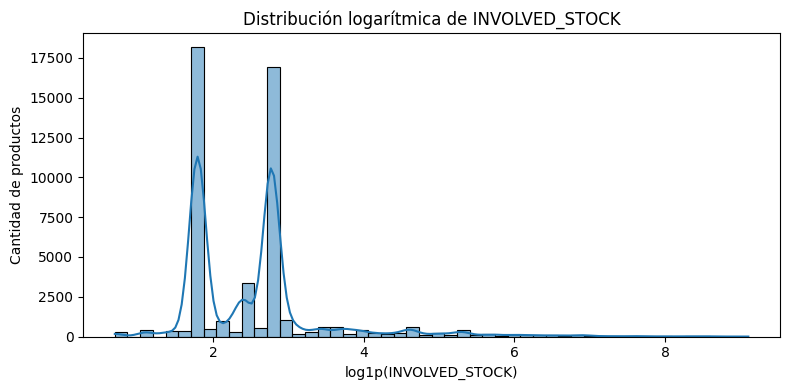

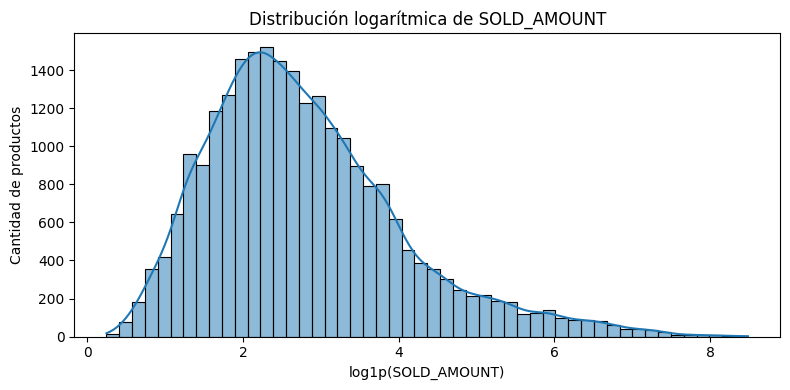

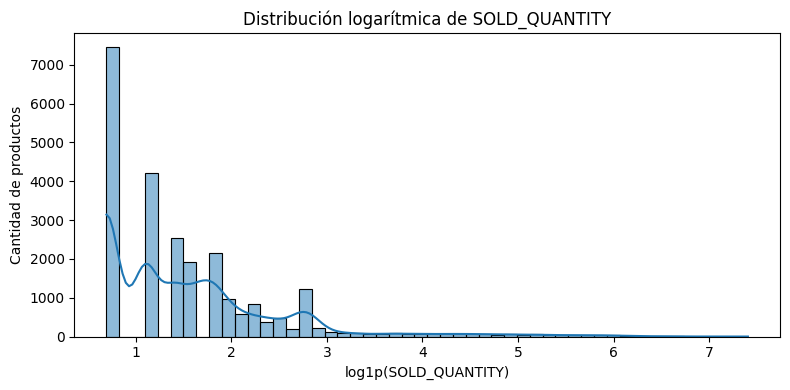

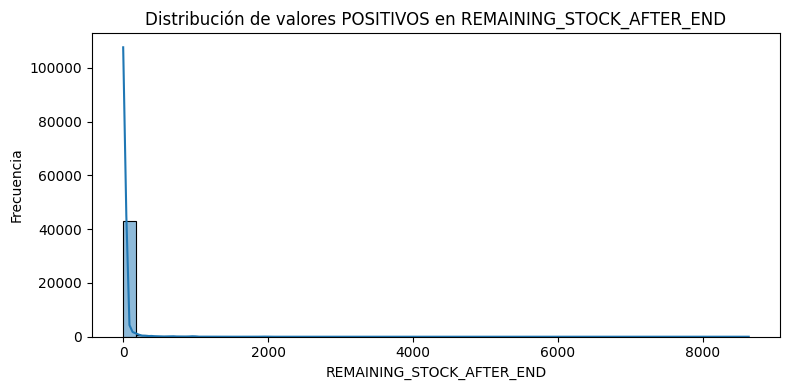

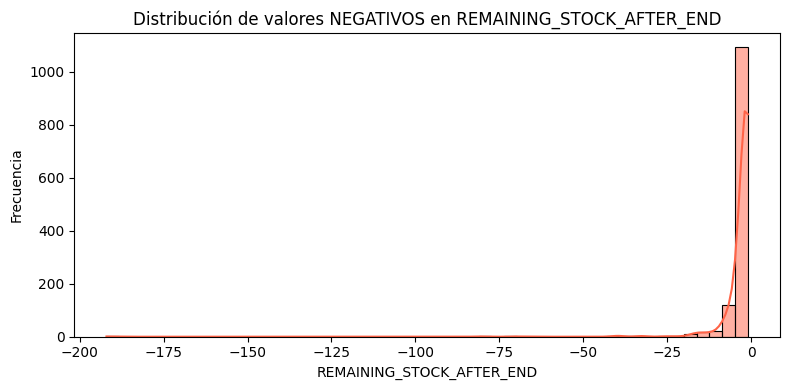

In [68]:
# Variables a transformar logarítmicamente (filtradas previamente)
cols_para_log = ['INVOLVED_STOCK', 'SOLD_AMOUNT', 'SOLD_QUANTITY']

# Histogramas en escala logarítmica para columnas sin valores negativos
for col in cols_para_log:
    datos_validos = df[col][(df[col] > 0) & (df[col].notnull())]
    plt.figure(figsize=(8, 4))
    sns.histplot(np.log1p(datos_validos), bins=50, kde=True)
    plt.title(f'Distribución logarítmica de {col}')
    plt.xlabel(f'log1p({col})')
    plt.ylabel('Cantidad de productos')
    plt.tight_layout()
    plt.show()

# Visualización de REMAINING_STOCK_AFTER_END separado en positivos y negativos
columna_stock_remanente = 'REMAINING_STOCK_AFTER_END'

# Valores positivos
plt.figure(figsize=(8, 4))
sns.histplot(df[df[columna_stock_remanente] > 0][columna_stock_remanente], bins=50, kde=True)
plt.title(f'Distribución de valores POSITIVOS en {columna_stock_remanente}')
plt.xlabel(columna_stock_remanente)
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()

# Valores negativos
plt.figure(figsize=(8, 4))
sns.histplot(df[df[columna_stock_remanente] < 0][columna_stock_remanente], bins=50, kde=True, color='tomato')
plt.title(f'Distribución de valores NEGATIVOS en {columna_stock_remanente}')
plt.xlabel(columna_stock_remanente)
plt.ylabel('Frecuencia')
plt.tight_layout()
plt.show()


- `INVOLVED_STOCK`: Se ve que la mayoría de las ofertas tiene un stock reducido a excepción de casos atípicos que ofertan miles de unidades.
Hay dos picos marcados en las barras y la línea: Esto sugiere que la mayoría de los productos se ofrecieron con un stock bajo, alrededor de 6 a 20 unidades. El resto del gráfico tiene colas largas:
Pocos productos con valores muy altos de stock.
- `SOLD_AMOUNT`: Tiene una distribución más suave y simétrica que las otras, si bien hay un pico alrededor de log1p(2.5) sugiere que los montos de venta de esos productos no son tan altos. Pero la cola a la derecha indica que hay productos que indican ventas de montos mas altos, pero no son tan frecuentes.
- `SOLD_QUANTITY`: Hay un pico muy fuerte cerca de log1p(1) ≈ 0.69, que indica que en la mayoría de los casos se vendió una sola unidad. Después la distribución cae rápidamente, pero hay algunos picos menores, lo que puede sugerir ventas de 2, 3, o más unidades ocasionales. Y la cola larga a la derecha indica que algunos productos se vendieron en grandes cantidades.
- `REMAINING_STOCK_AFTER_END`: Muchos productos no se agotaron, y en algunos casos, sobró bastante stock al finalizar la oferta (ej. +500 unidades no vendidas). Para el stock remanente negativo, la mayoría de los valores están en el rango de -1 a -20, lo cual sugiere que la sobraventa no fue extrema, pero vale la pena investigarlos o consultarlo con el equipo de negocio.

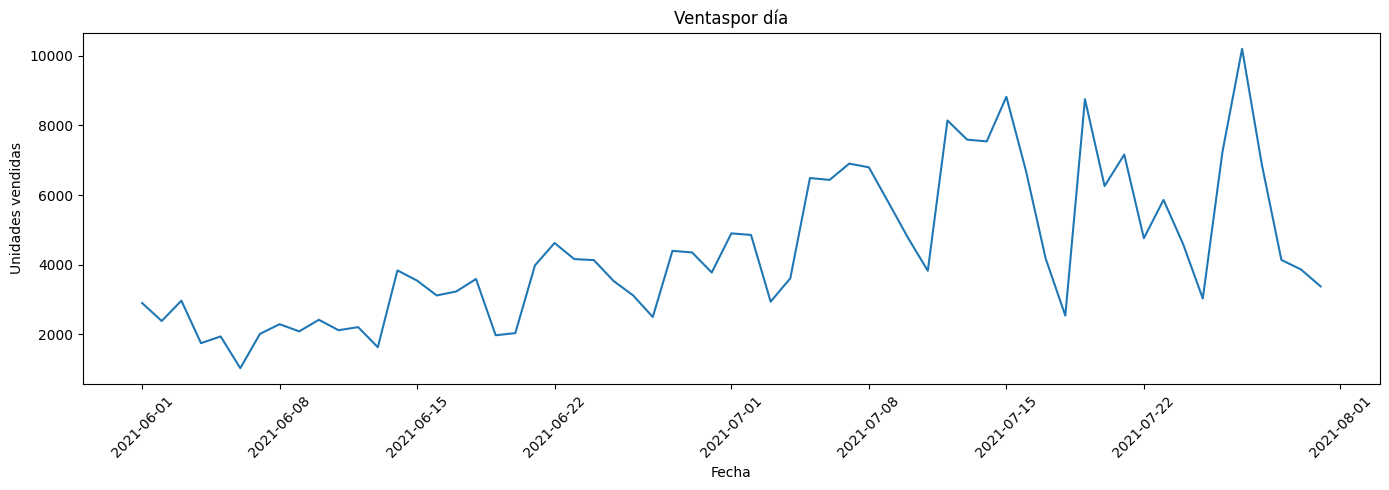

In [69]:
# Aseguramos que las fechas están en formato datetime
df["OFFER_START_DATE"] = pd.to_datetime(df["OFFER_START_DATE"])
df["OFFER_START_DTTM"] = pd.to_datetime(df["OFFER_START_DTTM"])

# Creamos columna para día de la semana
df["DAY_OF_WEEK"] = df["OFFER_START_DATE"].dt.day_name()

# Agrupamos por fecha y calcular la suma de unidades vendidas y el monto total vendido
daily_sales = df.groupby("OFFER_START_DATE").agg({
    "SOLD_QUANTITY": "sum",
    "SOLD_AMOUNT": "sum"
}).reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(data=daily_sales, x="OFFER_START_DATE", y="SOLD_QUANTITY")
plt.title("Ventaspor día")
plt.xlabel("Fecha")
plt.ylabel("Unidades vendidas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Algunos días tienen ventas mucho más altas que otros, pero vemos una tendencia a aumentar a partir de julio (puede estar relacionado con las vacaciones de invierno). Hay días con picos altos: puede que correspondan a campañas específicas, promociones o lanzamientos y también días pocas ventas, puede que en esos días no haya habido ninguna oferta activa o simplemente no se vendió nada.

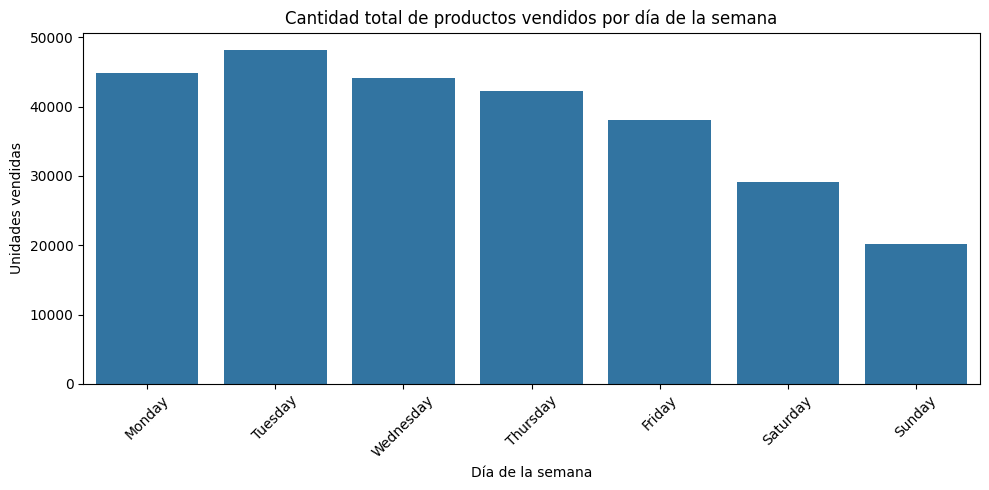

In [70]:
# Agrupamos por día de la semana y sumar la cantidad vendida
sales_by_weekday = df.groupby(df['DAY_OF_WEEK'])['SOLD_QUANTITY'].sum().reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

plt.figure(figsize=(10, 5))
sns.barplot(x=sales_by_weekday.index, y=sales_by_weekday.values)
plt.title("Cantidad total de productos vendidos por día de la semana")
plt.xlabel("Día de la semana")
plt.ylabel("Unidades vendidas")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Es probable que las campañas de ofertas se activen más los lunes, lo que explicaría los picos de venta, ya que los días Martes son los días con mayor cantidad de unidades vendidas El domingo suele tener menos actividad comercial, lo que se refleja también en la baja de ventas. Esto puede reflejar patrones de comportamiento de usuarios, logística o estrategia comercial.

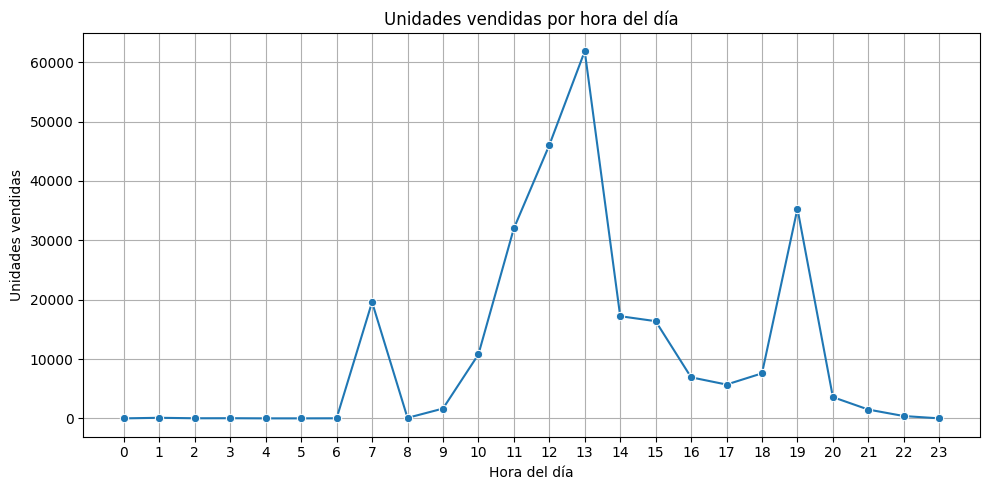

In [71]:
# Extraemos la hora del inicio de la oferta
df["OFFER_HOUR"] = df["OFFER_START_DTTM"].dt.hour

# Agrupamos por hora del día y sumar las unidades vendidas
sales_by_hour = df.groupby("OFFER_HOUR")["SOLD_QUANTITY"].sum()

# Graficar
plt.figure(figsize=(10, 5))
sns.lineplot(x=sales_by_hour.index, y=sales_by_hour.values, marker="o")
plt.title("Unidades vendidas por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Unidades vendidas")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


Hay un pico claro de ventas a las 10:00 hs, luego las ventas se mantienen relativamente estables hasta la tarde. Y Después de las 19:00 hs, las ventas caen notablemente. En la madrugada (0 a 6 hs), las ventas son casi nulas.

Es probable que las ofertas relámpago se activen en su mayoría durante la mañana, especialmente a las 10:00. Esto puede ser por una estrategia, captar atención en horarios laborales.

# 5. Análisis exploratorio entre variables

Vamos a reemplazar los NaN de SOLD_QUANTITY por 0.0 esto refleja que no hubo ventas registradas en ese caso.

In [72]:
#Vamos a transformar una copia del dataset para poder trabajar con los datos

# Creamos una copia para el EDA
df_eda = df.copy()

# Reemplazamos los nulos en SOLD_QUANTITY y SOLD_AMOUNT por 0
df_eda["SOLD_QUANTITY"] = df_eda["SOLD_QUANTITY"].fillna(0)
df_eda["SOLD_AMOUNT"] = df_eda["SOLD_AMOUNT"].fillna(0)

# Verificamos que no haya nulos en la copia
df_eda[["SOLD_QUANTITY", "SOLD_AMOUNT"]].isnull().sum()

SOLD_QUANTITY    0
SOLD_AMOUNT      0
dtype: int64

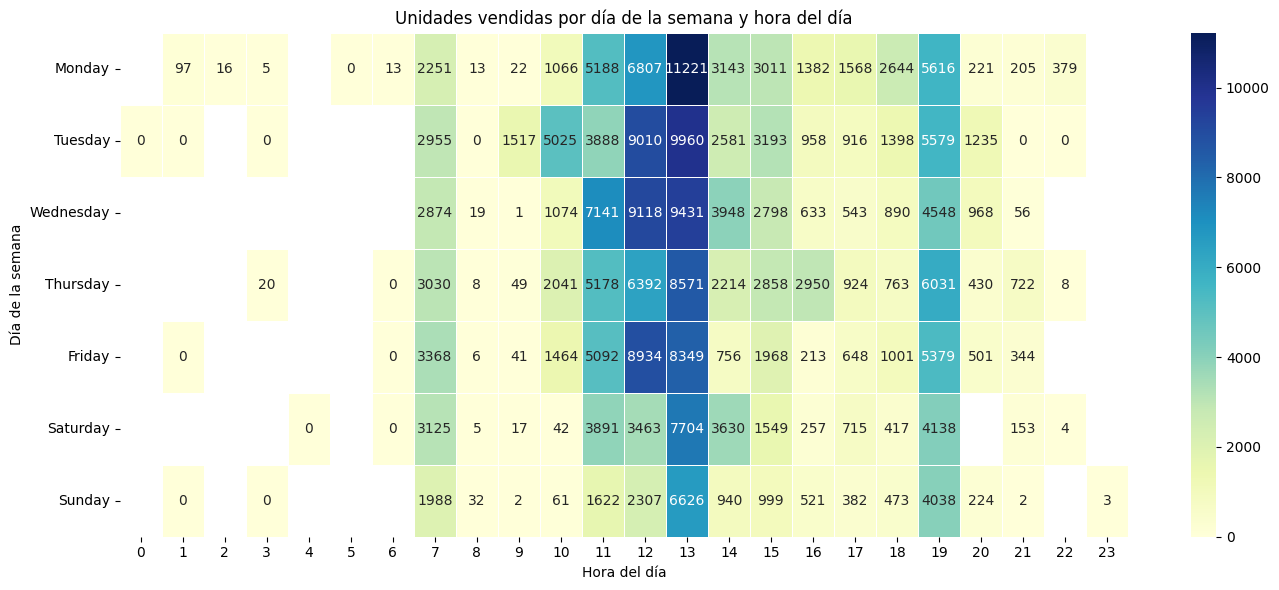

In [73]:
# Creamos tabla cruzada: Día de la semana vs Hora del día, suma de unidades vendidas
heatmap_data = df_eda.pivot_table(
    index="DAY_OF_WEEK",
    columns="OFFER_HOUR",
    values="SOLD_QUANTITY",
    aggfunc="sum"
).reindex([
    "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"
])

plt.figure(figsize=(14, 6))
sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f", linewidths=.5)
plt.title("Unidades vendidas por día de la semana y hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Día de la semana")
plt.tight_layout()
plt.show()

El martes a las 10am es el horario con mayor cantidad de ventas, también hay buenos picos de venta en la mañana de lunes y miércoles. Los fines de semana (sábado y domingo) tienen baja actividad en casi todas las horas. 

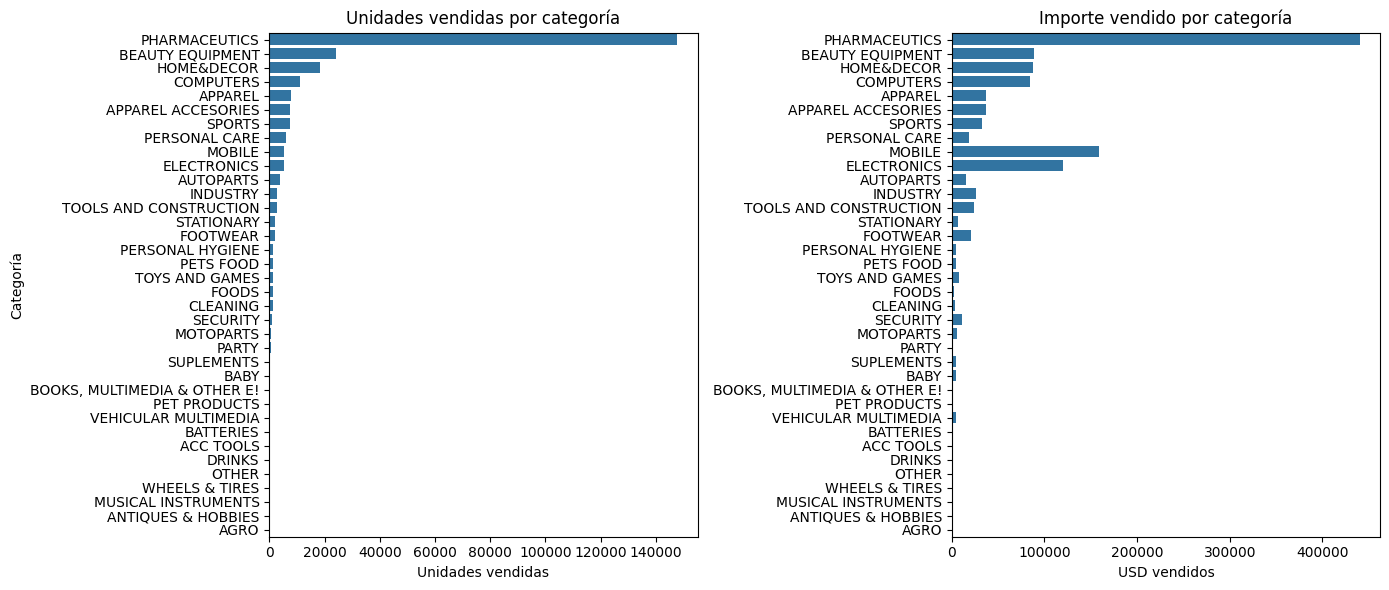

In [79]:
# Agrupamos por categoría general
category_sales = df_eda.groupby("DOM_DOMAIN_AGG1").agg({
    "SOLD_QUANTITY": "sum",
    "SOLD_AMOUNT": "sum"
}).sort_values(by="SOLD_QUANTITY", ascending=False)

# Visualizamos ambas métricas en un gráfico de barras comparativo
plt.figure(figsize=(14, 6))

# Creamos subgráfico para unidades
plt.subplot(1, 2, 1)
sns.barplot(x=category_sales["SOLD_QUANTITY"], y=category_sales.index)
plt.title("Unidades vendidas por categoría")
plt.xlabel("Unidades vendidas")
plt.ylabel("Categoría")

# Creamos subgráfico para importe
plt.subplot(1, 2, 2)
sns.barplot(x=category_sales["SOLD_AMOUNT"], y=category_sales.index)
plt.title("Importe vendido por categoría")
plt.xlabel("USD vendidos")
plt.ylabel("")

plt.tight_layout()
plt.show()


Aca podemos ver que las categorías con unidades mas vendidas son los de la categoría `PHARMACEUTICS` siguiendo por detras `BEAUTY QUIPMENT`. Pero en realidad Despues de los productos de farmacia las categorías que generaron mayores ingresos son los `ELECTRONICS` Y `MOBILE` a pesar de tener menos volumen.

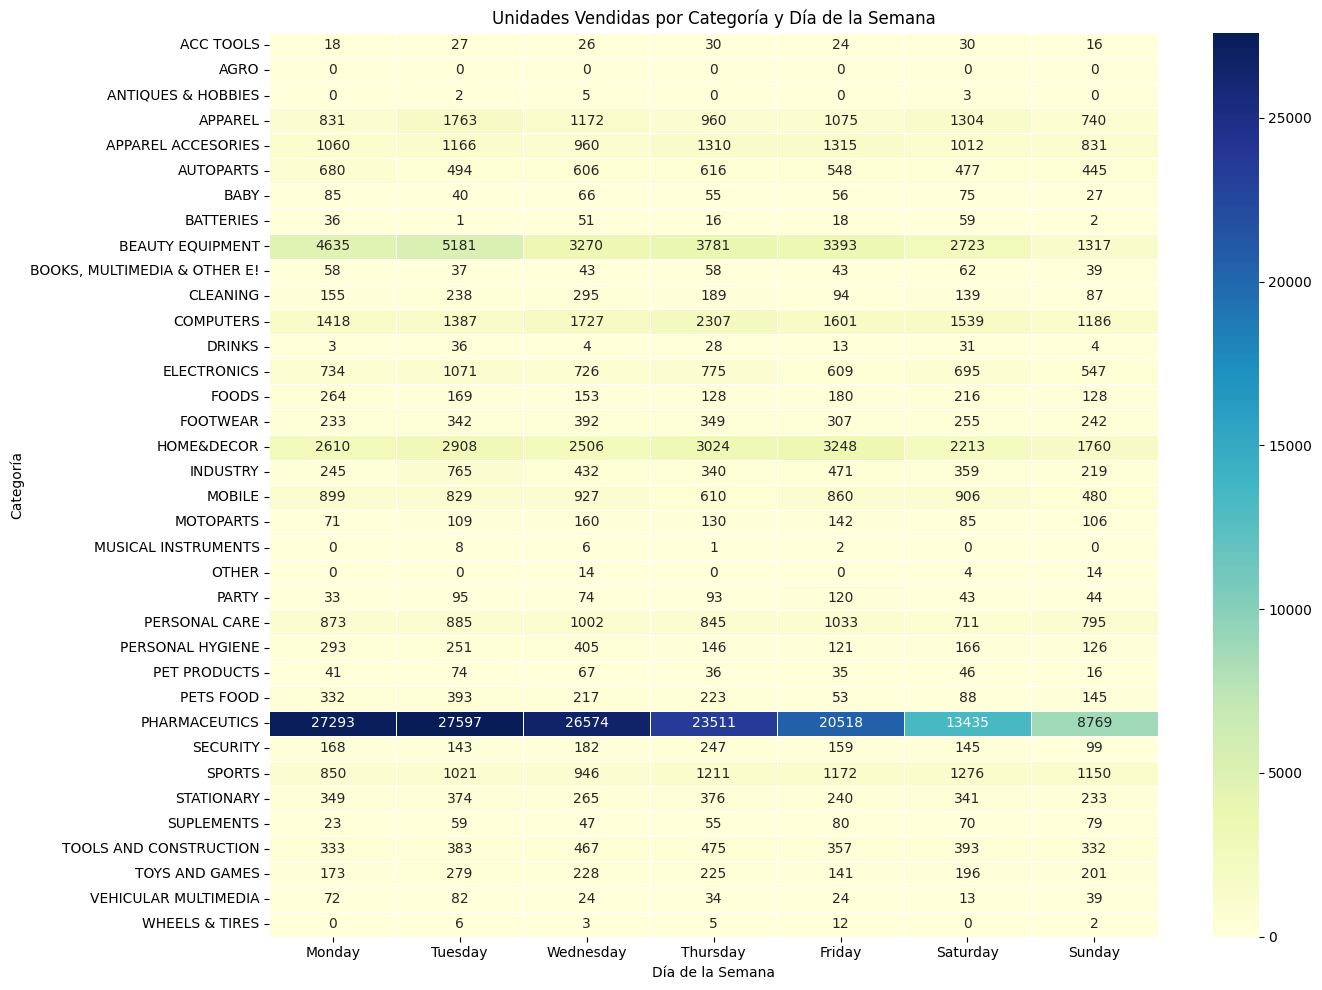

In [85]:
# Creamos la tabla cruzada
category_weekday = df_eda.pivot_table(
    index='DOM_DOMAIN_AGG1',
    columns='DAY_OF_WEEK',
    values='SOLD_QUANTITY',
    aggfunc='sum',
    fill_value=0
)

# Reordenamos columnas para mejor lectura
dias_ordenados = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
category_weekday = category_weekday[dias_ordenados]

# Visualizamos con heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(category_weekday, cmap='YlGnBu', annot=True, fmt=".0f", linewidths=0.5)
plt.title('Unidades Vendidas por Categoría y Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Categoría')
plt.tight_layout()
plt.show()


- PHARMACEUTICS es la categoría más vendida, con valores entre 14.345 y 27.293 unidades diarias. Fuerte demanda especialmente lunes, martes y miércoles.

- BEAUTY EQUIPMENT es el egundo mayor volumen total, con pico el martes (5.181 unidades). Las ventas disminuyen fuertemente los fines de semana.

- COMPUTERS también con buen desempeño los miércoles y jueves. Pero también mantiene cierto nivel durante el resto de días.

- HOME&DECOR tiene picos los miércoles y jueves. Esto puede estar relacionado con activaciones de campañas puntuales de decoración o días de promoción.



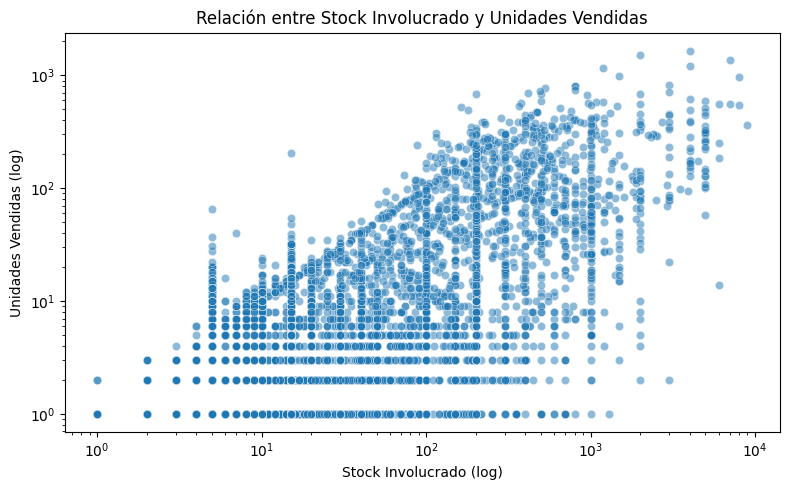

In [77]:
plt.figure(figsize=(8, 5))
sns. scatterplot(
    data=df_eda,
    x='INVOLVED_STOCK',
    y='SOLD_QUANTITY',
    alpha=0.5
)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Stock Involucrado (log)')
plt.ylabel('Unidades Vendidas (log)')
plt.title('Relación entre Stock Involucrado y Unidades Vendidas')
plt.tight_layout()
plt.show()

La escala logarítmica permite visualizar mejor esta relación en un rango amplio de valores, destacando patrones y outliers que serían difíciles de ver en escala lineal.

El gráfico muestra una relación positiva entre el stock involucrado y las unidades vendidas: en general, a mayor stock disponible, más unidades se venden.
Sin embargo, la dispersión de los puntos indica que no siempre un mayor stock garantiza más ventas, ya que existen muchos casos con alto stock y pocas ventas, y viceversa.



In [82]:
!pip install scipy

from scipy.stats import pearsonr

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---- ----------------------------------- 4.5/38.6 MB 24.4 MB/s eta 0:00:02
   ----------- ---------------------------- 11.0/38.6 MB 27.5 MB/s eta 0:00:02
   ------------------ --------------------- 17.6/38.6 MB 28.4 MB/s eta 0:00:01
   ------------------------ --------------- 23.6/38.6 MB 28.2 MB/s eta 0:00:01
   ------------------------------- -------- 29.9/38.6 MB 28.3 MB/s eta 0:00:01
   ------------------------------------- -- 35.9/38.6 MB 28.5 MB/s eta 0:00:01
   ---------------------------------------- 38.6/38.6 MB 26.9 MB/s  0:00:01


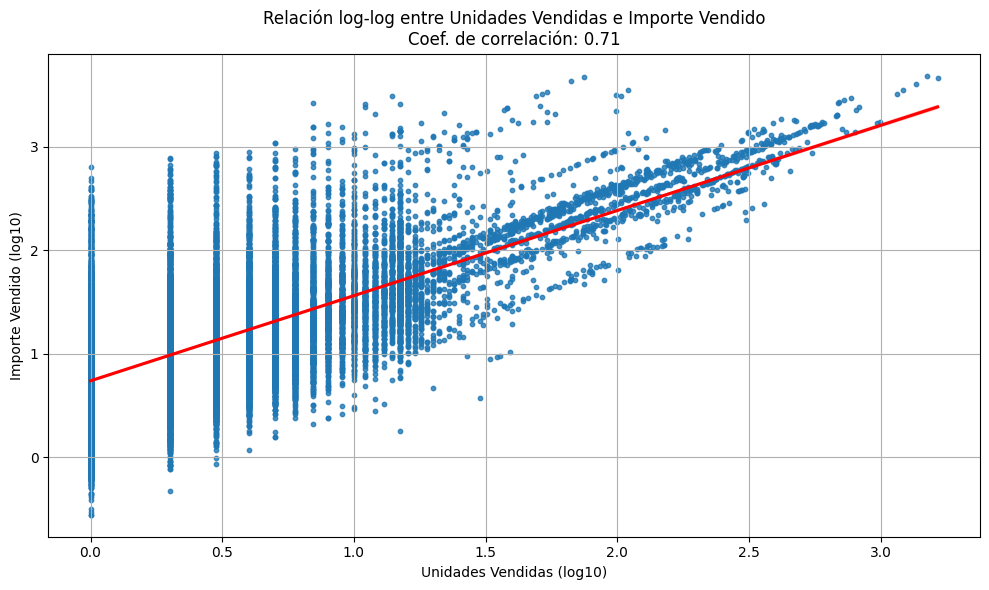

(None, 0.7057257096707575, 0.0)

In [83]:
# Filtramos los datos válidos para SOLD_AMOUNT y SOLD_QUANTITY
df_amount_log = df_eda[(df_eda['SOLD_AMOUNT'] > 0) & (df_eda['SOLD_QUANTITY'] > 0)].copy()
df_amount_log['log_sold_amount'] = np.log10(df_amount_log['SOLD_AMOUNT'])
df_amount_log['log_sold_qty'] = np.log10(df_amount_log['SOLD_QUANTITY'])

# Calcular correlación
corr_amt_qty, p_amt_qty = pearsonr(df_amount_log['log_sold_amount'], df_amount_log['log_sold_qty'])

# Graficar
plt.figure(figsize=(10, 6))
sns.regplot(x='log_sold_qty', y='log_sold_amount', data=df_amount_log,
            scatter_kws={'s': 10}, line_kws={"color": "red"})
plt.title('Relación log-log entre Unidades Vendidas e Importe Vendido\nCoef. de correlación: {:.2f}'.format(corr_amt_qty))
plt.xlabel('Unidades Vendidas (log10)')
plt.ylabel('Importe Vendido (log10)')
plt.grid(True)
plt.tight_layout()
plt.show(), corr_amt_qty, p_amt_qty


Se puede ver que hay una tendencia fuerte entre vender más unidades y generar mayor importe. El coeficiente de correlación ≈ 0.71 lo cual indica una correlación fuerte positiva, más alta que la observada entre stock y unidades vendidas.

Esto sugiere que, en promedio, cuantas más unidades se venden, mayor es el importe generado, como era esperable. Aún así, hay cierta dispersión que podría reflejar diferencias de precio entre productos ya que no es lo mismo vender 10 celulares que 10 lapiceras).

(Línea roja: muestra el ajuste lineal en escala log-log.)

# 6. Conclusiones

A partir del análisis exploratorio realizado al dataset sobre las ofertas relámpago, podemos concluir que:

Una de las categorías con mayor volumen de ventas es **Pharmaceutics**, que se mantiene consistentemente como la más vendida durante toda la semana. Su punto más alto se observa el día martes, con más de 27.000 unidades vendidas. Esta estabilidad sugiere que se trata de productos de alta rotación, probablemente esenciales o de reposición frecuente, por lo que es crucial garantizar su disponibilidad constante, especialmente a comienzos de la semana.

Por otro lado, la categoría **Beauty Equipment** muestra también un volumen significativo, con un pico notable el día martes. Sin embargo, sus ventas caen progresivamente hacia el fin de semana. Esto sugiere una oportunidad, lanzar campañas específicas los fines de semana podría ayudar a equilibrar el rendimiento de esta categoría a lo largo de la semana.

En el caso de **Computers**, se destaca un patrón interesante: las mayores ventas se concentran en la mitad de la semana (miércoles y jueves), con una caída hacia el viernes y el fin de semana. Esto podría deberse a que se trata de compras más racionales o planificadas, que se concretan en días hábiles. Una buena estrategia comercial sería impulsar promociones puntuales en esos días para maximizar su rendimiento.

**Mobile** y **Electronics**, que si bien no se encuentran entre las primeras en cantidad de unidades vendidas, sí se destacan fuertemente por el alto importe económico que generan. Esto indica que se trata de productos de mayor valor unitario, como smartphones o electrodomésticos, donde incluso pocas ventas representan ingresos significativos. En particular, **Mobile** mantiene un volumen estable de ventas durante toda la semana laboral, con mayor concentración entre martes y viernes. Por lo tanto, una estrategia comercial efectiva sería orientar campañas de alto valor a estos días centrales de la semana, como martes a jueves, e incluir incentivos como descuentos limitados o financiamiento especial.
Además, dado el impacto que tienen en los ingresos totales, incluso un pequeño incremento en las unidades vendidas de estas categorías podría representar una mejora considerable en la rentabilidad general de las campañas.


**Consideración sobre el stock negativo**

Durante el análisis exploratorio se detectaron registros con valores negativos en la variable REMAINING_STOCK_AFTER_END. Este tipo de situaciones puede estar reflejando inconsistencias en la gestión de inventario que conviene monitorear de forma específica ya que a futuro puede derivar en consecuencias críticas, ya que, pueden realizarse ventas de productos no disponibles y se generan malas experiencias de usuario (cancelaciones o retrasos), errores en la planificación de compras y reposiciones por tomar decisiones basados en datos incorrectos, problemas contables y de autidoría.

Sería ideal revisar nuevamente los procesos de actualización de inventario para implementar alertas y así disminuir lo más posible este tipo de casos.
